In [2]:
import cv2
import numpy as  np
import matplotlib.pyplot as plt

In [3]:
### File directory
datadir = './data/trainingData'
trainingFace = '/face/' #184
trainingBackground = '/background/' #249

[   0.  194. 1222. 2210. 1950.  882.  236.  396.  248.  788. 1526. 1624.
 1022.  346.    0.]
[   0.          194.         1222.         2210.         1950.
  882.          236.          396.          248.          788.
 1526.         1624.         1022.          346.            0.
  578.         1107.02935824 2569.190534   3135.2428933  2096.09207813
  327.95121588 1039.0235801  1296.5376971   881.34556219  204.68512403
 1684.70116044 2401.32171939 1803.77049538  741.35686413  230.
 1416.         2371.69348778 3335.64986172 2100.96406442  809.70117945
 3386.87407501 4734.0152091  5044.95014842 4813.74552713 3667.11685115
 1080.05370237 1805.81283637 2713.399344   1603.6720363   470.
 1804.         2848.70672411 2207.73413254 1234.31276425 4779.38092225
 6655.76742382 7034.5399281  6990.3683737  7045.494021   7080.68358282
 5344.87904447 1108.12634659 2430.1522586  2535.12050996  886.
 1524.         2486.45490609  345.61539318 4083.79260002 6490.2143262
 6157.03516313 4705.14803168 3947

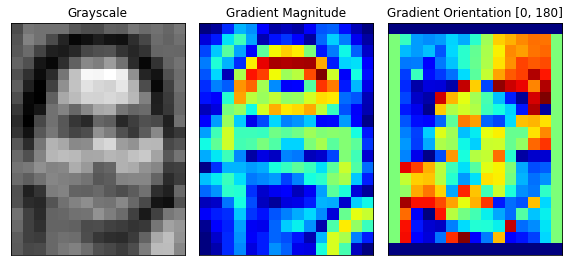

In [21]:
img  = cv2.imread('./data/trainingData/face/030.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gX = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=5)
gY = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=5)

magnitude = np.sqrt((gX ** 2) + (gY ** 2))
# print(magnitude[0])
print(magnitude.flatten())

# gX = cv2.convertScaleAbs(gX)
# gY = cv2.convertScaleAbs(gY)
# combined = cv2.addWeighted(gX, 0.5, gY, 0.5, 0)

# (fig, axs) = plt.subplots(nrows=1, ncols=3, figsize=(8, 4))

# # plot each of the images
# axs[0].imshow(gray, cmap="gray")
# axs[1].imshow(magnitude, cmap="jet")
# axs[2].imshow(orientation, cmap="jet")

# axs[0].set_title("Grayscale")
# axs[1].set_title("Gradient Magnitude")
# axs[2].set_title("Gradient Orientation [0, 180]")

# # loop over each of the axes and turn off the x and y ticks
# for i in range(0, 3):
#     axs[i].get_xaxis().set_ticks([])
#     axs[i].get_yaxis().set_ticks([])

# # show the plots
# plt.tight_layout()
# plt.show()

In [24]:
Pr_x_given_y_equalsTo_1 = np.zeros((300,184)) #likelihood for the face class\
Pr_x_given_y_equalsTo_0 = np.zeros((300,249)) #likelihood for the background class

# face
for i in range(184):

    img  = cv2.imread(datadir + trainingFace + "{0:03}".format(i+1) + '.jpg')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    gX = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=5)
    gY = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=5)

    magnitude = np.sqrt((gX ** 2) + (gY ** 2))
    Pr_x_given_y_equalsTo_1[:,i] = magnitude.flatten()
    
# background
for i in range(249):

    img  = cv2.imread(datadir + trainingBackground + "{0:03}".format(i+1) + '.jpg')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    gX = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=5)
    gY = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=5)

    magnitude = np.sqrt((gX ** 2) + (gY ** 2))
    Pr_x_given_y_equalsTo_0[:,i] = magnitude.flatten()

In [37]:
Pr_x_given_y_equalsTo_1

array([[   0.,    0.,    0., ...,    0.,    0.,    0.],
       [ 576.,  182.,  646., ..., 3212.,  100., 4680.],
       [1106., 1008., 1242., ..., 4206.,  152., 6848.],
       ...,
       [4428.,  970., 2794., ..., 1754., 4936., 1864.],
       [1048., 1758., 3394., ..., 1076., 3066., 2006.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.]])

In [33]:
# Face
Pr_x_given_y_equalsTo_1_mu = np.average(Pr_x_given_y_equalsTo_1,axis=1) 
print(Pr_x_given_y_equalsTo_1_mu.shape)
Pr_x_given_y_equalsTo_1_var = np.var(Pr_x_given_y_equalsTo_1, axis=1)

(300,)


In [26]:
Pr_x_given_y_equalsTo_1_dia = np.diag(Pr_x_given_y_equalsTo_1_var)

In [27]:
# Background
Pr_x_given_y_equalsTo_0_mu = np.average(Pr_x_given_y_equalsTo_0,axis=1) 
Pr_x_given_y_equalsTo_0_var = np.var(Pr_x_given_y_equalsTo_0, axis=1)

In [28]:
Pr_x_given_y_equalsTo_0_dia = np.diag(Pr_x_given_y_equalsTo_0_var)

In [36]:
## Testing
datadir = './data/testingData'
testingFace = '/face/' #232
testingBackground = '/background/' #564

def norm(x,u,o):
    first = -0.5*np.sum(np.log(o))
    second = np.sum(np.divide(np.power(np.subtract(x,u),2),2*o))
    return first - second

Pr_x_given_y_equalsTo_1_result = np.zeros(232)

# face
for i in range(232):
    img  = cv2.imread(datadir + testingFace + "{0:03}".format(i+1) + '.jpg')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    gX = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=5)
    gY = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=5)

    magnitude = np.sqrt((gX ** 2) + (gY ** 2)).flatten()
# #     print(magnitude.shape)
    
    if norm(magnitude,Pr_x_given_y_equalsTo_1_mu,Pr_x_given_y_equalsTo_1_var) > norm(magnitude,Pr_x_given_y_equalsTo_0_mu,Pr_x_given_y_equalsTo_0_var):
        Pr_x_given_y_equalsTo_1_result[i] = 1
    else:
        Pr_x_given_y_equalsTo_1_result[i] = 0

Pr_x_given_y_equalsTo_0_result = np.zeros(564)

# # background
# for i in range(564):

#     img  = cv2.imread(datadir + testingBackground + "{0:03}".format(i+1) + '.jpg')
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#     gX = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=5)
#     gY = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=5)

#     magnitude = np.sqrt((gX ** 2) + (gY ** 2)).flatten()
            
#     if norm(magnitude,Pr_x_given_y_equalsTo_1_mu,Pr_x_given_y_equalsTo_1_var) > norm(magnitude,Pr_x_given_y_equalsTo_0_mu,Pr_x_given_y_equalsTo_0_var):
#         Pr_x_given_y_equalsTo_1_result[i] = 1
#     else:
#         Pr_x_given_y_equalsTo_1_result[i] = 0


/tmp/ipykernel_476/3937493333.py:7: RuntimeWarning: divide by zero encountered in log
  first = -0.5*np.sum(np.log(o))
/tmp/ipykernel_476/3937493333.py:8: RuntimeWarning: invalid value encountered in true_divide
  second = np.sum(np.divide(np.power(np.subtract(x,u),2),2*o))
